<a href="https://colab.research.google.com/github/LanucciG/ml_finished_project/blob/main/Ml_Finished_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECTS

## Biblioteca


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/paolasouza/data_mining_and_big_data/ec70f701a784820fa6ca326c0d51d8740028da03/projects.csv"
dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


## Renomeando Colunas

In [ ]:
mapa = {
    "unfinished" : "nao_finalizado",
    "expected_hours" : "horas_esperadas",
    "price" : "preco"
}
dados = dados.rename(columns = mapa)

In [ ]:
x = dados[["horas_esperadas","preco"]] #features

In [ ]:
y = dados["nao_finalizado"] # classes
y.head()

0    1
1    1
2    1
3    1
4    1
Name: nao_finalizado, dtype: int64

In [ ]:
dados.shape

(2157, 3)

## Plotando Gráfico

In [ ]:
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


<Axes: xlabel='horas_esperadas', ylabel='preco'>

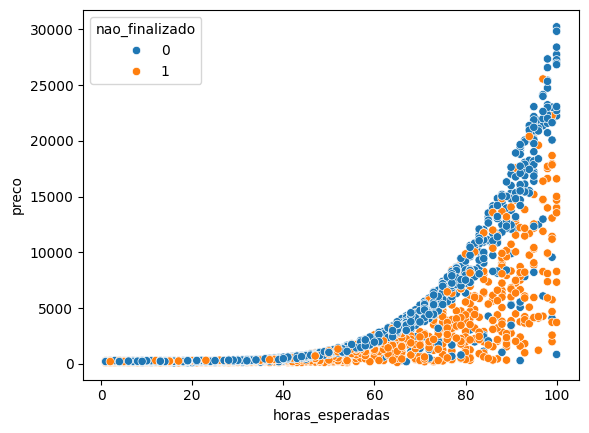

In [ ]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", hue="nao_finalizado", data=dados)

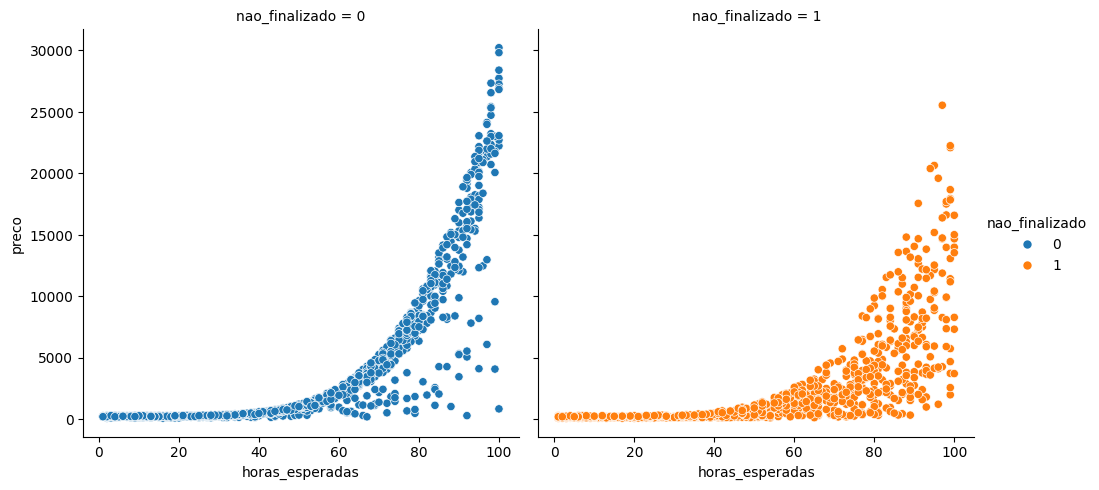

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", hue="nao_finalizado", col="nao_finalizado", data=dados)

## Balanceamento dos dados

In [ ]:
dados.nao_finalizado.value_counts()

nao_finalizado
0    1134
1    1023
Name: count, dtype: int64

## Classificação Binária

- CLASSES (Y) -> BOUGHT (1/0) -> CLASSIFICAÇÃO BINÁRIA

- FREATURE NÃO DEFINE SE CLASSIFICAÇÃO É BINÁRIA

In [ ]:
x = dados[["horas_esperadas","preco"]] #features
y = dados["nao_finalizado"] # classes

## Teste 1 - Linear SVC

In [ ]:
from math import gamma
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR
modelo = LinearSVC()
modelo.fit(treino_x, treino_y) # treina o modelo
previsoes = modelo.predict(teste_x) # teste

acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores
acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.81%
A acurácia foi 59.81%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Plotando Gráfico do Modelo

<Axes: xlabel='horas_esperadas', ylabel='preco'>

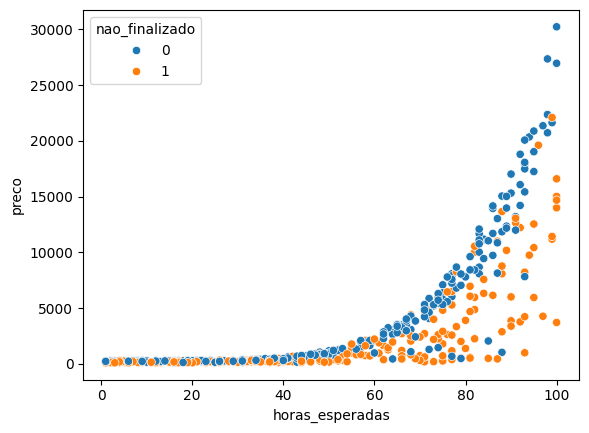

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

### Plotando Dados

1 100 102 30223


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


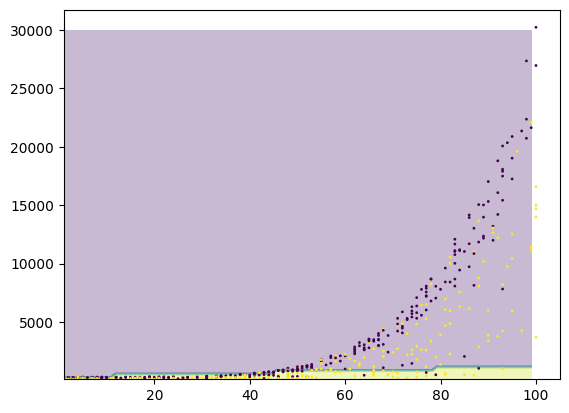

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


# DECISION BOUNDARY

### Comparação Acurácia Dummy

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 52.59%


## Teste 2 - SVC

In [ ]:
from math import gamma
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR

# trocar modelo = LinearSVC()
modelo = SVC(gamma="auto") # gamma "auto" para adaptar a curva
modelo.fit(treino_x, treino_y) # treina o modelo
previsoes = modelo.predict(teste_x) # teste

acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores
acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.26%
A acurácia foi 59.26%


### Plotando Gráfico do Modelo

<Axes: xlabel='horas_esperadas', ylabel='preco'>

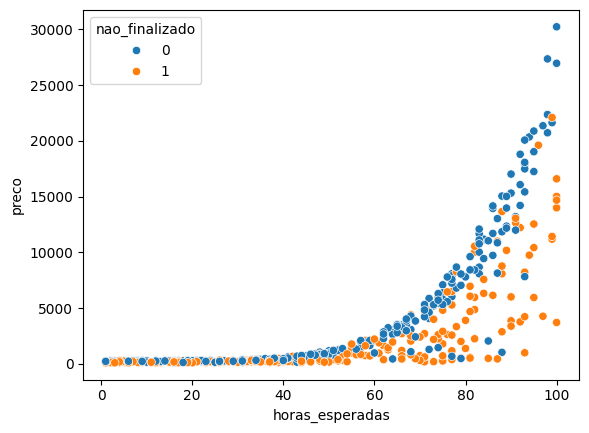

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

### Plotando dados

1 100 102 30223


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


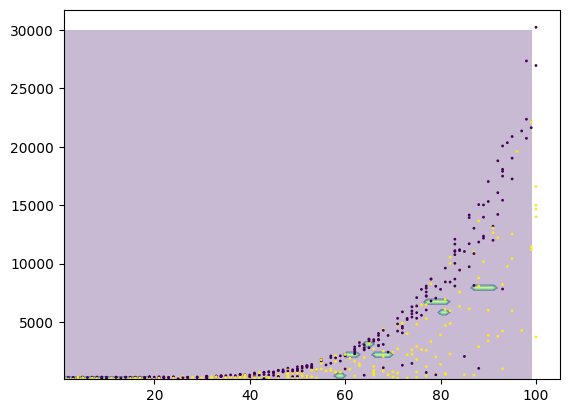

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


# DECISION BOUNDARY

### Comparação Acurácia Dummy

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 52.59%


## Teste 3 - StandardScaler

In [ ]:
from math import gamma
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#Transformação das escalas
scaler = StandardScaler()
scaler.fit(raw_treino_x) # criando o normalizador treinando com o raw_treino_x
treino_x = scaler.transform(raw_treino_x) # treino x normalizado - escalas iguais
teste_x = scaler.transform(raw_teste_x) # teste x normalizado - escalas iguais

#CLASSIFICADOR
modelo = SVC(gamma="auto") # gamma "auto" para adaptar a curva
modelo.fit(treino_x, treino_y) # treina o modelo
previsoes = modelo.predict(teste_x) # teste

acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores
acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.67%
A acurácia foi 66.67%


### Plotando Dados

-1.7378488427660956 1.7219205428392383 -0.5994275222214345 5.323277268254419


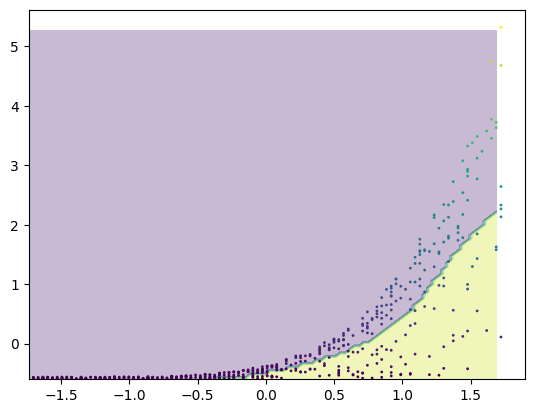

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=data_y, s=1)


# DECISION BOUNDARY

### Comparação Acurácia Dummy

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 52.59%


### Usando o modelo SVC StandardScale

In [ ]:
projeto = [[100,200]]
previsao = scaler.transform(projeto)
previsao

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.72192054, -0.58015774]])

In [ ]:
modelo.predict(previsao)

array([1])